In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.preprocessing import LabelEncoder
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [87]:
df = pd.read_csv(r"Bank.csv", sep=';')

C:\Users\icon\AppData\Local\Temp\ipykernel_14892\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

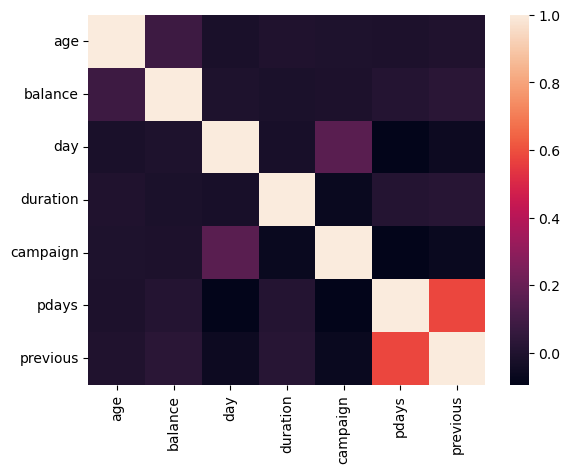

In [88]:
sns.heatmap(df.corr())

In [46]:
for i in df.columns:
    print(i)
    print(df[i].unique())

age
[30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]
job
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
marital
['married' 'single' 'divorced']
education
['primary' 'secondary' 'tertiary' 'unknown']
default
['no' 'yes']
balance
[ 1787  4789  1350 ...  -333 -3313  1137]
housing
['no' 'yes']
loan
['no' 'yes']
contact
['cellular' 'unknown' 'telephone']
day
[19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 18 12 21 26 22  2  4 15  8
 28  9  1 10 31 25 24]
month
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
duration
[  79  220  185  199  226  141  341  151   57  313  273  113  328  261
   89  189  239  114  250  148   96  140  109  125  169  182  247  119
  149   74  897   81   40  958  354  150   97  132  765   

In [51]:
df###  y column madhe bagh no ani yes ahe tyala categorical madhe convert karych ahe 
### so apan label encoding, one hot encoding,dummies use karu shakto to convert categorical data into numerical 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


In [59]:
df.isnull().sum() # check karych pratek time null values ahe ki nahi

#jar interger column madhe null value asel tar mean ne replace tar ( use function:mean())
#jar categorical column madhe null value asel tar mode ne replace tar ( use function:mode()[0])


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [89]:
X=df.drop(["y"],axis=1)
#X=df.drop(["y","balance","day","duration","campaign","pdays","previous"],axis=1)
y=df["y"]
X_encoded = pd.get_dummies(X)

In [ ]:
df["y"].unique() ### etha ata no=0 ani yes=1 replace zala ahe tasach bakiche pan replace zale column madhle categories

In [90]:
X_train,X_test,Y_train,y_test=train_test_split(X_encoded,y,test_size=0.3,random_state=0)
rf=RandomForestClassifier(n_estimators=10)
rf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=10)

In [67]:
y_pred = rf.predict(X_test)

In [69]:
accuracy=accuracy_score(y_test,y_pred)

In [70]:
accuracy

0.8938835666912307

In [71]:
confusion=confusion_matrix(y_test,y_pred)

In [72]:
confusion

array([[1172,   18],
       [ 126,   41]], dtype=int64)

In [82]:
precision=classification_report(y_test,y_pred)

TypeError: classification_report() takes 2 positional arguments but 3 were given

In [85]:
print(precision,"\n")

              precision    recall  f1-score   support

          no       0.90      0.98      0.94      1190
         yes       0.69      0.25      0.36       167

    accuracy                           0.89      1357
   macro avg       0.80      0.62      0.65      1357
weighted avg       0.88      0.89      0.87      1357
 

